In [1]:
!pip install wordcloud

In [2]:
!pip install spacy

In [3]:
!pip install textblob

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Importing & Loading the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [6]:
# Importing the training data by reading from .tsv file using tab seperation '\t'

movie=pd.read_csv('C:/Users/aswin/Downloads/labeledTrainData.tsv', delimiter='\t',  engine='c')
print(movie.shape)
movie.head(10)

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


# Exploratory Data Analysis

In [7]:
# Summary of the Dataset
movie.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
#sentiment count
movie['sentiment'].value_counts()         # Where 1 ----> Positive Sentiment
                                          #       0 ----> Negative Sentiment

1    12500
0    12500
Name: sentiment, dtype: int64

# Data Pre-Processing

 Text Normalization

In [9]:
#Tokenization of text
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

Removing HTML strips and noise text

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
movie['review'] = movie['review'].apply(denoise_text)

Removing Special Characters

In [11]:
#Defining a  function for removing special characters

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

#Apply function on review column
movie['review'] = movie['review'].apply(remove_special_characters)

Text Stemming: 

It is the process of reducing the word to it's basic or root form

In [12]:
#Stemming the text

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
movie['review'] = movie['review'].apply(simple_stemmer)

Removing the Stopwords

In [13]:
# Seting stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{'what', 'weren', 'both', 'at', 'just', "shouldn't", 'by', 'am', 'again', 'who', 'same', 'their', 'any', 'doesn', 'yourself', 'have', 'each', 'should', 'it', 'which', 'i', 'here', 'yourselves', "you're", 'because', 'doing', "wouldn't", 'how', 'his', 'whom', 'did', 'hadn', 'himself', 'haven', "you'd", 'myself', 'yours', 'why', 'her', 'ma', 'does', 'needn', 'they', 'him', 'had', 'a', 'an', 'the', 'into', 'these', 'if', 'through', 'ain', 'that', 'ours', 've', 'or', "won't", 'while', 'now', 'before', 't', 'against', 'isn', 'where', "she's", 'couldn', 'do', 'he', 'itself', 'some', 'during', "mustn't", 'few', 'aren', 'with', "mightn't", 'nor', 'for', 'there', 'no', 'shan', 'wouldn', 'when', 'on', "isn't", 'll', "doesn't", 'won', 'and', 'you', 'its', 'until', 'she', 'further', 'than', "you've", 'be', 'my', 'down', 'y', 'me', 'so', "couldn't", 'over', 'we', 'own', 'hasn', 'wasn', "hadn't", "should've", 'don', 'mightn', 'was', 'having', 'being', 'of', "that'll", "shan't", 'as', 'your', 'not', "

In [14]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
movie['review']=movie['review'].apply(remove_stopwords)

# Train_Test_Split

In [15]:
# Now we shall split the processed data into train & test groups

# Splitting the dataset  

#train dataset
train_reviews=movie.review[:20000]
train_sentiments=movie.sentiment[:20000]

#test dataset
test_reviews=movie.review[20000:]
test_sentiments=movie.sentiment[20000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(20000,) (20000,)
(5000,) (5000,)


Normalized Training Reviews

In [16]:
#normalized train reviews
norm_train_reviews=movie.review[:20000]
norm_train_reviews[0]


## Convert dataframe to string
norm_train_string=norm_train_reviews.to_string()

# Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()

# Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

Normalized Testing Reviews

In [17]:
#Normalized test reviews
norm_test_reviews=movie.review[20000:]
norm_test_reviews[24500]


## Convert dataframe to string
norm_test_string=norm_test_reviews.to_string()

# spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())

# Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

# Bag Of Words (BoW)

In [18]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))                   # Initialising Count Vector

#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)

#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (20000, 3430926)
BOW_cv_test: (5000, 3430926)


# Term Frequency Inverse Document Frequency Model (TF-IDF)

In [19]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (20000, 3430926)
Tfidf_test: (5000, 3430926)


Our next step is to label the sentiment feature and assign that to train and test

In [20]:
# Labeling the sentient data
lb=LabelBinarizer()

# Transformed sentiment data
sentiment_data=lb.fit_transform(movie['sentiment'])
print(sentiment_data.shape)

(25000, 1)


In [21]:
#Spliting the sentiment data

train_sentiments=sentiment_data[:20000]
test_sentiments=sentiment_data[20000:]

print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


# Building Model

# Stochastic Gradient Descent using Bag of Words (BoW) & TF-IDF

In [22]:
# Training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)      # Creating an instance of classifier with parameters specifed

# Fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

# Fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


Model Performance on Test Data

In [23]:
# Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

# Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Accuracy Score

In [24]:
# Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

# Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.539
svm_tfidf_score : 0.4944


Classification Report

In [25]:
# Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

# Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.52      1.00      0.68      2472
    Negative       0.96      0.09      0.17      2528

    accuracy                           0.54      5000
   macro avg       0.74      0.54      0.42      5000
weighted avg       0.74      0.54      0.42      5000

              precision    recall  f1-score   support

    Positive       0.49      1.00      0.66      2472
    Negative       0.00      0.00      0.00      2528

    accuracy                           0.49      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.24      0.49      0.33      5000



Confusion Matrix

In [26]:
# Confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)

# Confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[ 232 2296]
 [   9 2463]]
[[   0 2528]
 [   0 2472]]


# Multinomial Naive Bayes using Bag of Words (BoW) & TF-IDF

In [27]:
# Training the model
mnb=MultinomialNB()

# Fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

# Fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


Model Performance on Test Data

In [28]:
# Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


Accuracy Score

In [29]:
# Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

# Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7394
mnb_tfidf_score : 0.7368


Classification Report

In [30]:
# Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

# Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.74      0.74      2472
    Negative       0.75      0.74      0.74      2528

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000

              precision    recall  f1-score   support

    Positive       0.72      0.76      0.74      2472
    Negative       0.75      0.72      0.73      2528

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000



Confusion Matrix

In [31]:
# Confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)

# Confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[1862  666]
 [ 637 1835]]
[[1808  720]
 [ 596 1876]]


Our final analysis method is using the help of WordCloud to pictorially see the positive and negative sentiments

WordCloud

WordCloud For Positive Review words

<function matplotlib.pyplot.show(close=None, block=None)>

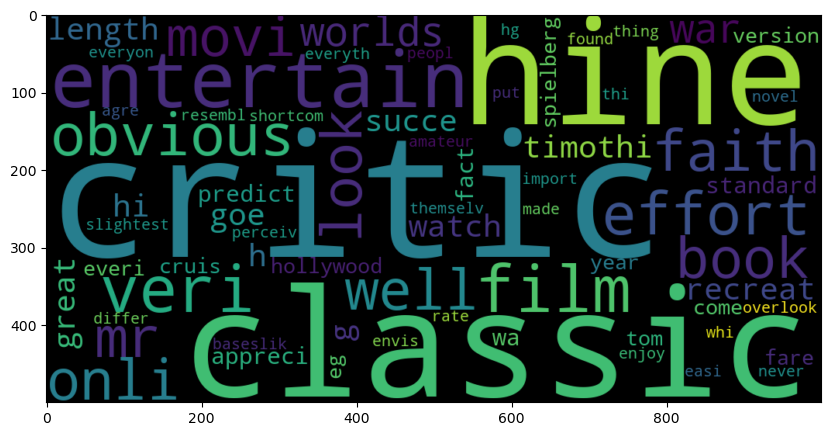

In [32]:
# Word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

WordCloud for Negative Review words

<function matplotlib.pyplot.show(close=None, block=None)>

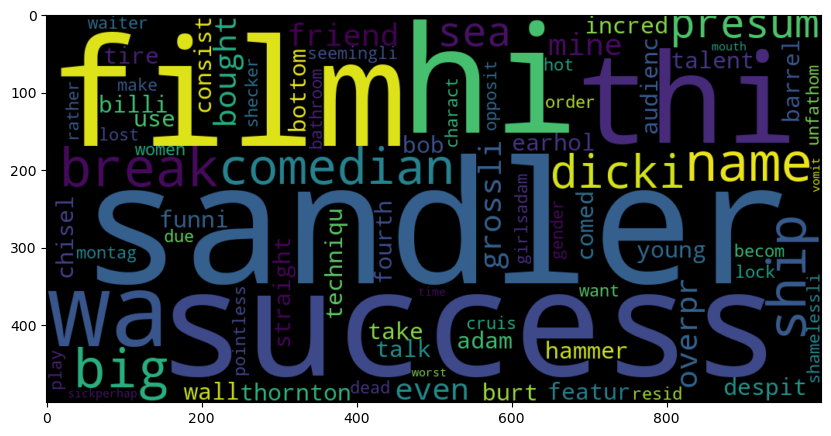

In [33]:
# Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show